# Исследование компьютерных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Цель данного исследования - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 г.

В нашем распоряжении имеются данные до 2016 года.

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Для реализации поставленной цели будут проделаны следующие шаги: изучена информация таблицы; произведена предобработка данных; произведен исследовательский анализ данных; составлен портрет пользователя каждого региона; проверены гипотеза о том, что 	средние пользовательские рейтинги платформ Xbox One и PC одинаковые и гипотеза о том, что средние пользовательские рейтинги жанров Action  и Sports  разные.  

###1 Изучение общей информации

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/datasets/games.csv')

In [ ]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
data.duplicated().sum()

0

В рассматриваемой таблице с данными 16715 строк и 10 столбцов. В 6 столбцах (Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating) имеются пропуски. Присутствует разнорегистровое наименование столбцов. Дубликаты отсутствуют.

###2 Подготовка данных

In [ ]:
data.columns = data.columns.str.lower() # приводим наименования столбцов к нижнему регистру

In [ ]:
data.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [ ]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
data = data.dropna(subset=['name']).reset_index(drop=True)

Удаляем строки с пропущенным названием игры, т.к. востановить название нет возможности, таких строк всего две и в данных строках много пропущенных значений. Пропуски в данных строках могли возникнуть по причине не внесения названия игры.

In [ ]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [ ]:
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
data.query('name=="Madden NFL 2004"')['year_of_release']

183        NaN
1880    2003.0
3888    2003.0
5707    2003.0
Name: year_of_release, dtype: float64

In [ ]:
name = data.query('year_of_release.isna()')['name'].unique()
for i in name:
    print(data.loc[data['name'] == i][['name','year_of_release']])

                 name  year_of_release
183   Madden NFL 2004              NaN
1880  Madden NFL 2004           2003.0
3888  Madden NFL 2004           2003.0
5707  Madden NFL 2004           2003.0
                   name  year_of_release
377    FIFA Soccer 2004              NaN
2605   FIFA Soccer 2004           2003.0
12028  FIFA Soccer 2004           2003.0
13085  FIFA Soccer 2004           2003.0
                             name  year_of_release
397    LEGO Batman: The Videogame           2008.0
456    LEGO Batman: The Videogame              NaN
460    LEGO Batman: The Videogame           2008.0
1518   LEGO Batman: The Videogame           2008.0
1537   LEGO Batman: The Videogame              NaN
1552   LEGO Batman: The Videogame           2008.0
12464  LEGO Batman: The Videogame           2008.0
                           name  year_of_release
475  wwe Smackdown vs. Raw 2006              NaN
                 name  year_of_release
609    Space Invaders              NaN
4263   Space Inv

In [ ]:
names_unique = data['name'].unique()
for x in names_unique:
      y = data.loc[~(data['year_of_release'].isna()) & (data['name'] == x)]['year_of_release'].unique()
      if (len(y)) == 1:
        data.loc[((data['year_of_release'].isna()) & (data['name']==x)), 'year_of_release'] = y[0]

In [ ]:
data['year_of_release'].isna().sum()

158

In [ ]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16555.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000
mean,2006.492298,0.263302,0.145045,0.077625,0.047343,68.967679
std,5.863442,0.813565,0.503359,0.308871,0.186742,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [ ]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,8068.000000
mean,2006.492298,0.263882,0.145788,0.078060,0.047573,68.996529
std,5.863442,0.816572,0.505527,0.310171,0.187539,13.919636
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [ ]:
1-data['na_sales'].count()/16715

0.009572240502542573

В столбце year_of_release восстанавливаем пропуски, где это возможно (если присутствует игра с таким же наименоваем как и у игры с пропущенным годом и годы выхода у такой игры не различатся). Т.к. востановить данные в оставшихся 158 строках нет возможности - их удаляем. Т.к. в столбце указаны годы, чтобы избавиться от запятой - изменяем тип данных на int.

In [ ]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

In [ ]:
data['critic_score'] = data['critic_score'].fillna(0)

In [ ]:
data['critic_score'] = data['critic_score'].astype('int')

В столбце critic_score пропущенно довольно много значений, восстановить значения по имеющимся данным возможности нет, скорее всего пропуски оставлены намерено и обозначают отсутствие оценки критиков, оценки критиков 0 не существует, поэтому за отсутствие оценки принимаем 0 и заменяем все пропуски на 0. Также изменяем в данном столбце тип данных на int.

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
519,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0,tbd,T
642,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
713,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16535,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16537,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16538,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16544,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0,tbd,E


In [ ]:
data.query('user_score == "0"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2814,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,0,0,E


In [ ]:
data['user_score'] = data['user_score'].fillna(-1)

In [ ]:
data.loc[(data['user_score']=='tbd'),'user_score']=-1

In [ ]:
data['user_score'] = pd.to_numeric(data['user_score'])

In [ ]:
data['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

В столбце 'user_score' имелось большое количество пропусков. Также здесь присутствовало 2391 строки со значением рейтинга "tbd", такое большое количество значений не может быть ошибкой, видимо данный рейтинг проставлен намерено, и скорее всего, так как он не числовой, имеется в виду отсутствие на данный момент рейтинга. Также отсутствием рейтинга можно объяснить и пропуски, но даже если пропуски это просто ошибка, все равно по имеющимся данным восстановить значения возможности нет. Для дальнейшей работы с рейтингом присутствие пропусков и значения tbd доставило бы трудности, поэтому данным ячейкам присвоено числовое значение, это также позволило изменить тип данного столбца с object на float. Т.к. в оценках пользователей присутствует оценка со значением 0, всем ячейкам с пропусками и со значением tbd присвоено значение -1.

In [ ]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
data.query('rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16550,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,-1.0,NaN
16551,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,-1.0,NaN
16552,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,-1.0,NaN
16553,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,-1.0,NaN


In [ ]:
data['rating'] = data['rating'].fillna('without raiting')

In [ ]:
data['rating'].unique()

array(['E', 'without raiting', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Т.к. восстановить пропущенный рейтинг по имеющимся данным возможности нет, заполним пропуски значением "without raiting". Пропуски рейтинга можно объяснить либо ошибкой при заполнении, либо отсутствием присвоенного рейтинга.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16555 entries, 0 to 16554
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16555 non-null  object 
 1   platform         16555 non-null  object 
 2   year_of_release  16555 non-null  int64  
 3   genre            16555 non-null  object 
 4   na_sales         16555 non-null  float64
 5   eu_sales         16555 non-null  float64
 6   jp_sales         16555 non-null  float64
 7   other_sales      16555 non-null  float64
 8   critic_score     16555 non-null  int64  
 9   user_score       16555 non-null  float64
 10  rating           16555 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


Создаем новый столбец с суммарными продажами во всех регионах:

In [ ]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Столбцы таблицы были приведены к нижнему регистру. Все пропуски в таблице были обработаны. Строки с пропусками в названии были удалены по причине их совсем незначительного количества (2). Пропуски в годах выпуска частично были восстановлены, частично удалены (158). В столбце critic_score пропуски заменены на 0. В столбце 'user_score' ячейки с пропусками и со значением tbd заменены на -1. Пропуски в столбце rating заполнены значением "without raiting". Тип данных в столбце year_of_release изменен с float на  int (т.к. годы - это целочисленные значения), тип данных в столбце user_score изменен с object на float (рейтинг - числовое значение). Добавлен новый столбец 'total_sales' с суммарными продажами во всех регионах. Доля удаленных данных составила менее 1%. Для удобства дальнейшей работы с данными от пропусков полностью избавились.

###3 Исследовательский анализ данных

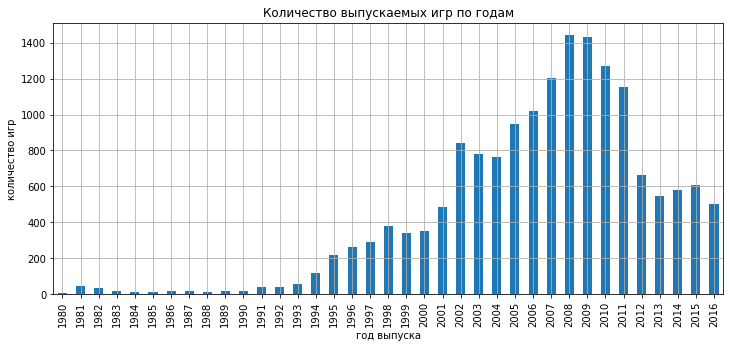

In [ ]:
(data.pivot_table(index='year_of_release', values='name', aggfunc='count')
     .plot.bar(xlabel='год выпуска', ylabel='количество игр',
              title='Количество выпускаемых игр по годам',legend=None, figsize=(12,5), grid=True)
);

Мы видим, что с 90-х годов начинается рост выпускаемых игр в 2002 наблюдается скачок, когда количество игр выросло почти в 2 раза, наибольшее число игр выпускалось с 2007 по 2011 года, с абсолютным максимумом в 2008-2009 гг. С 2012 года видно падение в 2 раза и количество игр в последующих годах приблизительно на одном уровне. Количество выпускаемых игр до 1995 года ничтожно мало. Т.о. мы видим тенденцию постоянного роста выпуска игр до 2008-2009 гг., что понятно, развивались технологии и происходил рост, но с 2009 года начинается снижение с резким падением в 2012 и в дальнейшем уже сохраняется практически на одном уровне, т.о. можно сделать предположение, что в 2012 году что-то в производстве игр серьезно изменилось.

In [ ]:
platform_sales = (data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                      .sort_values(by='total_sales', ascending=False).reset_index()
                 )
platform_sales

,platform,total_sales
0,PS2,1245.96
1,X360,966.61
2,PS3,934.71
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,292.77
9,PC,258.51


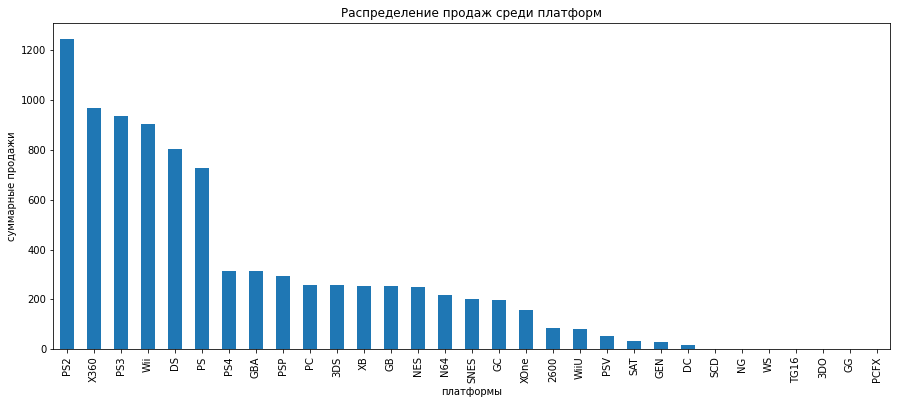

In [ ]:
platform_sales.plot.bar(x='platform', xlabel='платформы', ylabel='суммарные продажи',
                       title='Распределение продаж среди платформ',legend=None, figsize=(15,6));

In [ ]:
def func(name_platform):
    (data[name_platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .plot.bar(xlabel='год выпуска', ylabel='суммарные продажи',
                      title='Суммарные продажи по годам',legend=None)
    )

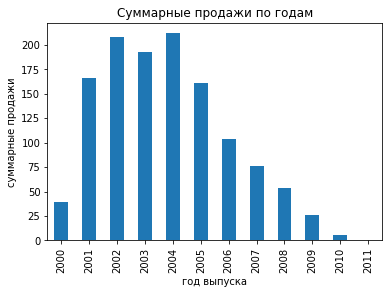

In [ ]:
func(data['platform'] == "PS2")

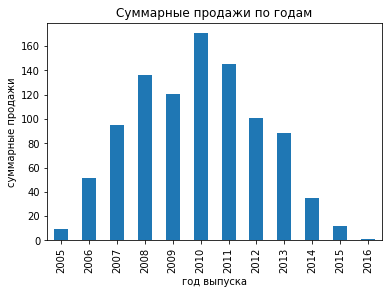

In [ ]:
func(data['platform'] == "X360")

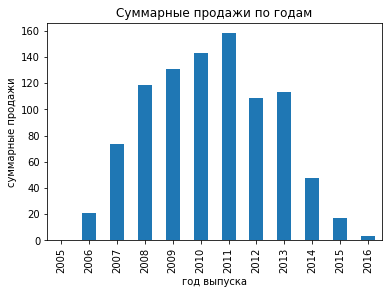

In [ ]:
func(data['platform'] == "PS3")

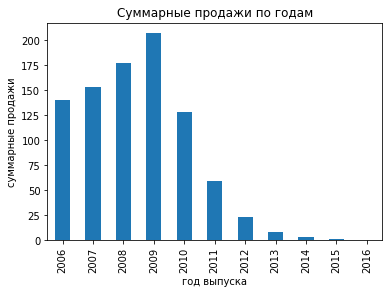

In [ ]:
func(data['platform'] == "Wii")

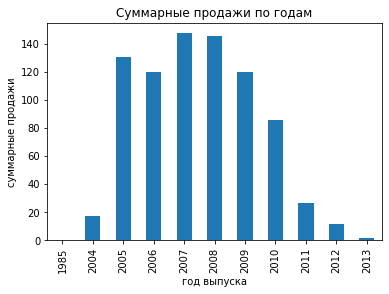

In [ ]:
func(data['platform'] == "DS")

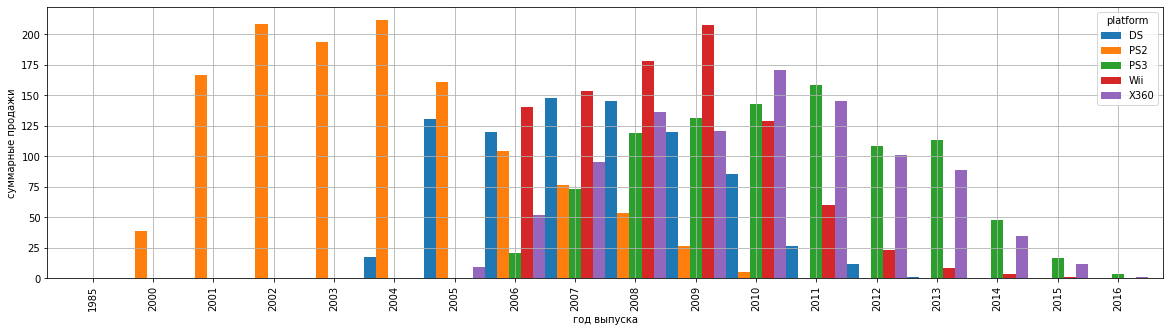

In [ ]:
data_platform_max=data.query('platform=="PS2" or platform=="X360" or platform=="PS3" or platform=="Wii" or platform=="DS"')
(data_platform_max.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot.bar(xlabel='год выпуска', ylabel='суммарные продажи', figsize=(20,5), width=1, grid=True)
);

In [ ]:
data.groupby(by='platform')['year_of_release'].nunique().describe()

count    31.000000
mean      7.774194
std       5.097121
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

Средний срок за который появляются новые и исчезают старые платформы составляет примерно 10 лет. Рассмотрев как меняется количество продаж по годам у пяти наиболее коммерчески успешных платформ, можно увидеть тенденции жизненного цикла платформы: появляясь на рынке платформа  начинает свой рост, достигает максимума и потом идет спад продаж, причем у одних платформ уже в первый год продажи высокие, а у других увеличение продаж происходит более плавно.

In [ ]:
data_new = data.query('year_of_release>=2014')

Для дальнейшего ИА определяем актуальный период - 2014-2016 гг. Для анализа будем брать данные за последние три года, чтобы лучше проследить динамику, т.к. основываться на данных только за один предыдущий год было бы неправильно, один год может быть непоказателен. Как мы видели ранее начиная с 2012 года количество выпускаемых игр примерно одинаковое, соответственно тенденции на рынке игр похожи. Но брать слишком большой период начиная с 2012 опасно, за такой период происходит очень много изменений.

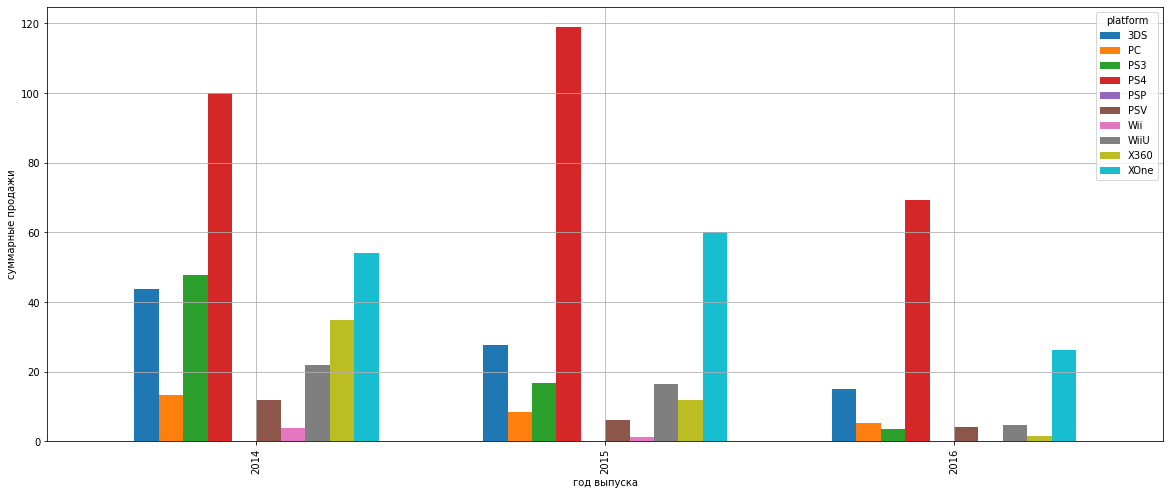

In [ ]:
(data_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot.bar(xlabel='год выпуска', ylabel='суммарные продажи', figsize=(20,8), width=.7, grid=True)
);

В рассматриваемом периоде у двух платформ (PS4 и XOne), которые являются лидерами по продажам, наблюдается одинаковая динамика продаж - рост в 2015 году и резкое падение (почти в 2 раза) в 2016 году. При этом стоит отметить, что платформа PS4 явный лидер продаж, и ее суммарные продажи в 2 раза превышают продажи XOne. У остальных платформ падение продаж происходит от года к году.

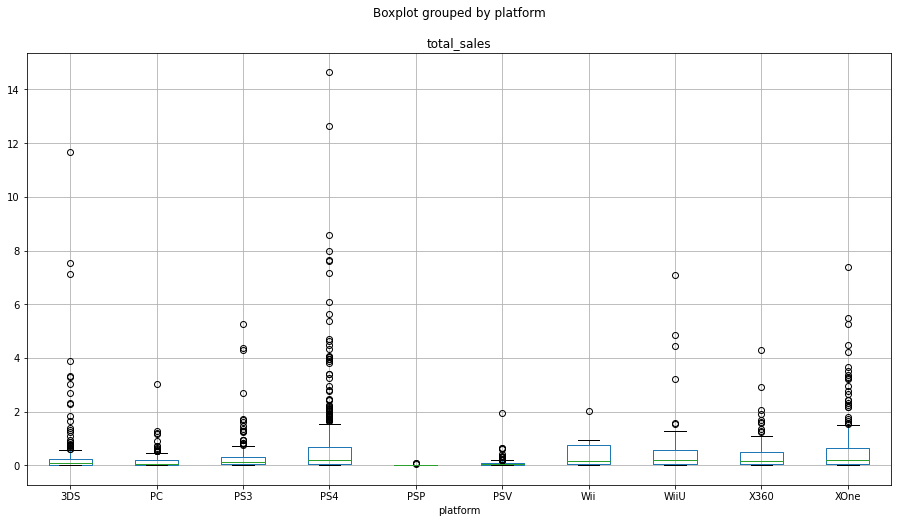

In [ ]:
data_new.boxplot('total_sales', by='platform', figsize=(15,8));

(0.0, 1.6)

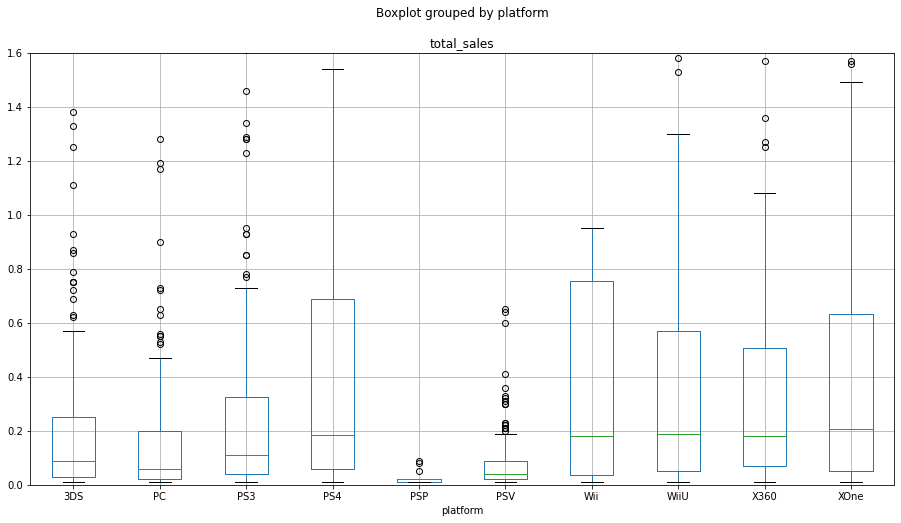

In [ ]:
data_new.boxplot('total_sales', by='platform', figsize=(15,8))
plt.ylim(0,1.6)

In [ ]:
data_new.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


У платформы PS4 присутсвуют аномально большие значения (выбросы), видимо на данной платформе присутсвуют сверх популярные игры, которые позволили данной платформе занять лидирующие позиции по продажам, хотя если смотреть медианные показатели продаж, у платформы XOne они даже выше. Платформы PS4 лидирует и по количеству выпущенных игр в рассматриваемом периоде.

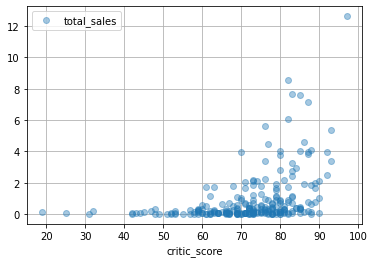

In [ ]:
data_PS4_critic = data_new.query('platform == "PS4" and critic_score != 0')
data_PS4_critic.plot(x='critic_score', y='total_sales', style='o', grid=True, alpha=0.4);

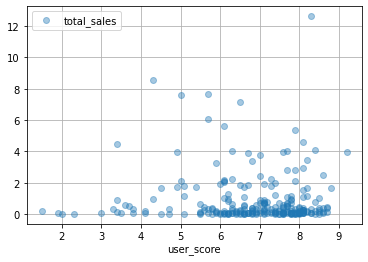

In [ ]:
data_PS4_user = data_new.query('platform == "PS4" and user_score != -1')
data_PS4_user.plot(x='user_score', y='total_sales', style='o', grid=True, alpha=0.4);

In [ ]:
data_PS4_critic['critic_score'].corr(data_PS4_critic['total_sales'])

0.40266141068104083

In [ ]:
data_PS4_user['user_score'].corr(data_PS4_user['total_sales'])

-0.040131589472697356

Для платформы PS4 влияние оценок критиков на продажи слабое, а оценок пользователей практически отсутствует.

Платформа 3DS


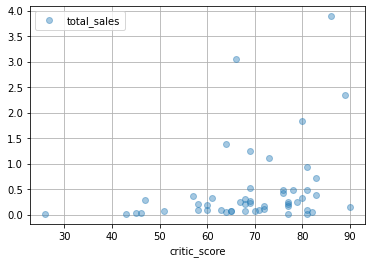

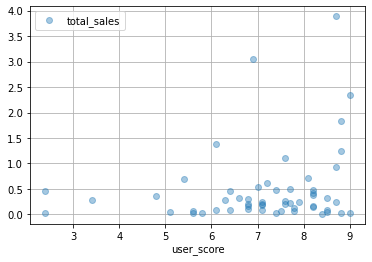

3DS корреляция оценка критиков/продажи: 0.314117492869051 корреляция оценка пользователей/продажи: 0.2151932718527028

Платформа XOne


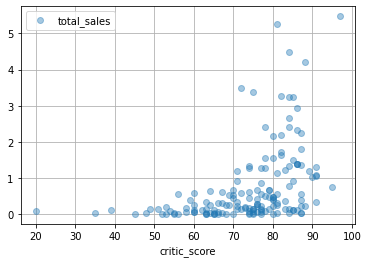

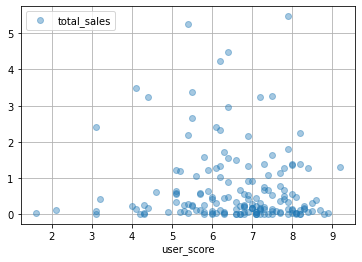

XOne корреляция оценка критиков/продажи: 0.42867694370333226 корреляция оценка пользователей/продажи: -0.0703839280647581

Платформа WiiU


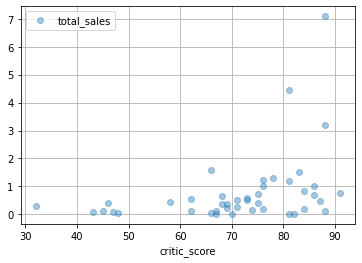

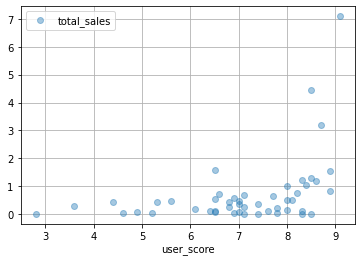

WiiU корреляция оценка критиков/продажи: 0.370201412480884 корреляция оценка пользователей/продажи: 0.40792645792170773

Платформа PS3


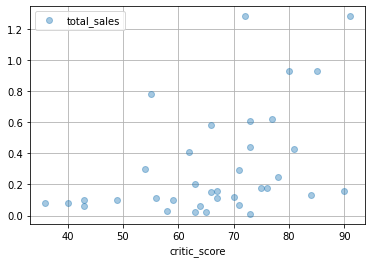

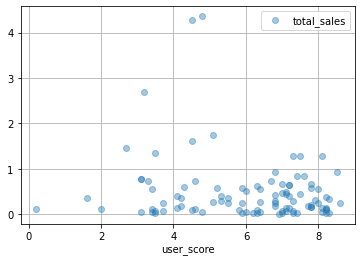

PS3 корреляция оценка критиков/продажи: 0.44657460493190704 корреляция оценка пользователей/продажи: -0.16676141347662118

Платформа X360


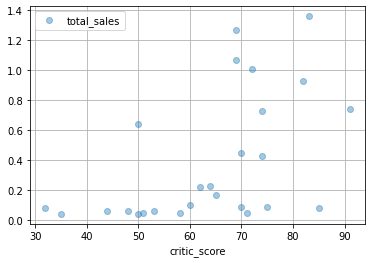

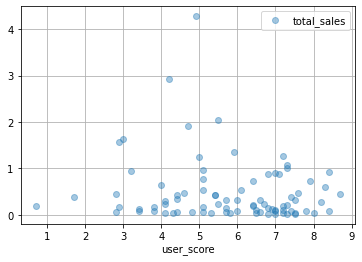

X360 корреляция оценка критиков/продажи: 0.5257228356581523 корреляция оценка пользователей/продажи: -0.138444570945665

Платформа PC


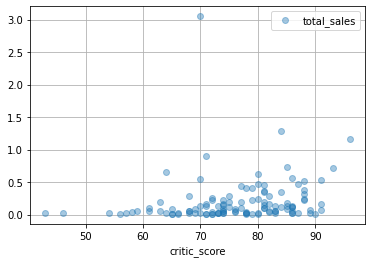

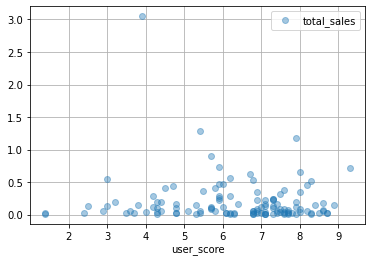

PC корреляция оценка критиков/продажи: 0.17463413769350036 корреляция оценка пользователей/продажи: -0.07159665703472451

Платформа PSV


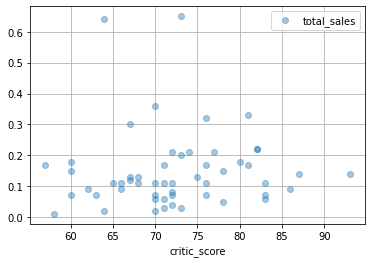

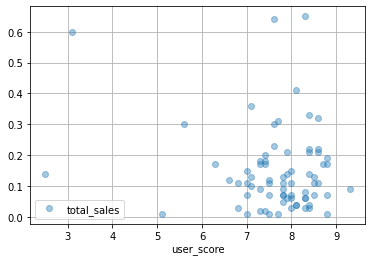

PSV корреляция оценка критиков/продажи: 0.04266490657009526 корреляция оценка пользователей/продажи: -0.16845504978064446



In [ ]:
platform = ['3DS','XOne','WiiU','PS3','X360','PC','PSV']
for i in platform:
    data_critic = data_new.loc[(data_new['platform'] == i) & (data_new['critic_score'] != 0)]
    corr_critic = data_critic['critic_score'].corr(data_critic['total_sales'])
    data_user = data_new.loc[(data_new['platform'] == i) & (data_new['user_score'] != -1)]
    corr_user = data_user['user_score'].corr(data_user['total_sales'])
    print('Платформа', i)
    data_critic.plot(x='critic_score', y='total_sales', style='o', grid=True, alpha=0.4)
    plt.show()
    data_user.plot(x='user_score', y='total_sales', style='o', grid=True, alpha=0.4)
    plt.show()
    print(i, 'корреляция оценка критиков/продажи:', corr_critic, 'корреляция оценка пользователей/продажи:', corr_user)
    print()


Для платформ WiiU и 3DS присутствует слабое положительное влияние оценок критиков и пользователей на продажи, причем для платформы WiiU влияние оценок критиков и пользователей равнозначно. Для платформы XOne влияние оценок критиков на продажи слабое положительное, а оценок пользователей практически отсутствует, показатели данной платформы схожи с платформой PS4. Для платформы PS3 влияние оценок критиков на продажи слабое положительное, а оценок пользователей очень слабое отрицательное, для X360 влияние оценок критиков среднее положительное, а оценок пользователей очень слабое отрицательное. Для платформы PC влияние оценок критиков очень слабое, а оценок пользователей практически отсутствует, а у PSV влияние оценок критиков практически отсутствует, а пользователей очень слабое отрицательное. Таким образом мы видим, что на продажи разных платформ оценки критиков и пользователей оказывают разное влияние. В большинстве случаев оценки критиков имеют большее значение, а оценки пользователей чаще практически не оказывают влияние. Т.е. можно сделать вывод, что на основании оценок игр строить прогнозы продаж некорректно.

In [ ]:
genre = (data_new.pivot_table(index='genre', values='total_sales')
         .sort_values(by='total_sales', ascending=False).reset_index()
         )
genre

,genre,total_sales
0,Shooter,1.335469
1,Sports,0.680000
2,Platform,0.476053
3,Fighting,0.470333
4,Role-Playing,0.459005
5,Racing,0.398841
6,Misc,0.332301
7,Action,0.322068
8,Simulation,0.298409
9,Puzzle,0.157857


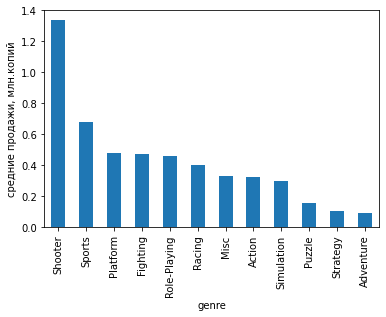

In [ ]:
genre.plot.bar(x='genre', y='total_sales', ylabel='средние продажи, млн.копий', legend=None);

Самые продаваемые игры жанра Shooter, на втором месте жанра Sports. Игры с наименьшими продажами - Strategy и Adventure, их продажи схожи. Средние продажи игр жанра Shooter в 14 раз превышают средние продажи игр жанра Adventure.

Рассмотрев тенденцию выпуска игр по годам, мы увидели, что до  2008-2009 гг наблюдался рост количества выпускаемых игр, с 2009 начинается уменьшение количества, а в 2012 что-то изменилось, т.к. начиная с 2012 г произошло резкое (почти в 2 раза уменьшение) количества выпускаемых игр, которое в последующих годах практически не менялось. На рынке периодически появляются новые платформы. Средний срок за который появляются новые и исчезают старые платформы составляет около 10 лет. Определив актуальным периодом - 2014-2016 гг. мы увидели, что в указанный период платформы PS4 и XOne являлись лидерами по продажам, при этом платформа PS4 явный лидер,ее суммарные продажи в 2 раза превышают продажи XOne. У данных платформ наблюдается одинаковая динамика продаж - рост в 2015 году и резкое падение (почти в 2 раза) в 2016 году. Также стоит отметить, что снижение продаж в 2016 году наблюдается по всем платформам. Рассмотрев влияние на продажи отзывов критиков и пользователей, видно, что на продажи разных платформ оценки критиков и пользователей оказывают разное влияние, но оно либо слабое, либо очень слабое. В большинстве случаев оценки критиков имеют большее значение, а оценки пользователей чаще практически не оказывают влияние. Т.е. можно сделать вывод, что на основании оценок игр строить прогнозы продаж некорректно. Рассмотрев распределение игр по жанрам, видно что выделяются игры с высокими и низкими продажами, причем отличие самой продаваемой от самой не продаваемой игры в 14 раз. Т.о. видно, что жанр игры оказывает влияние на ее продажи.

###4 Портрет пользователя каждого региона

**Самые популярные платформы (топ-5)**

In [ ]:
na_platform = (data_new.pivot_table(index='platform', values='na_sales', aggfunc='sum')
                       .sort_values(by='na_sales', ascending=False)
              )
na_platform['share_of_sales'] = (na_platform['na_sales']/(na_platform['na_sales'].sum())*100).round(2)
na_platform_5 = na_platform.head(5).reset_index()
na_platform_5.columns = ['платформа', 'продажи, млн.копий', 'доля продаж']
print('Самые популярные платформы в Северной Америке')
na_platform_5

Самые популярные платформы в Северной Америке


,платформа,"продажи, млн.копий",доля продаж
0,PS4,98.61,34.71
1,XOne,81.27,28.61
2,X360,28.30,9.96
3,3DS,22.64,7.97
4,PS3,22.05,7.76


In [ ]:
eu_platform = (data_new.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                       .sort_values(by='eu_sales', ascending=False)
              )
eu_platform['share_of_sales'] = (eu_platform['eu_sales']/(eu_platform['eu_sales'].sum())*100).round(2)
eu_platform_5 = eu_platform.head(5).reset_index()
eu_platform_5.columns = ['платформа', 'продажи, млн.копий', 'доля продаж']
print('Самые популярные платформы в Европе')
eu_platform_5

Самые популярные платформы в Европе


,платформа,"продажи, млн.копий",доля продаж
0,PS4,130.04,48.04
1,XOne,46.25,17.09
2,PS3,25.54,9.44
3,PC,17.97,6.64
4,3DS,16.12,5.96


In [ ]:
jp_platform = (data_new.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                       .sort_values(by='jp_sales', ascending=False)
              )
jp_platform['share_of_sales'] = (jp_platform['jp_sales']/(jp_platform['jp_sales'].sum())*100).round(2)
jp_platform_5 = jp_platform.head(5).reset_index()
jp_platform_5.columns = ['платформа', 'продажи, млн.копий', 'доля продаж']
print('Самые популярные платформы в Японии')
jp_platform_5

Самые популярные платформы в Японии


,платформа,"продажи, млн.копий",доля продаж
0,3DS,44.24,47.52
1,PS4,15.02,16.13
2,PSV,14.54,15.62
3,PS3,11.22,12.05
4,WiiU,7.31,7.85


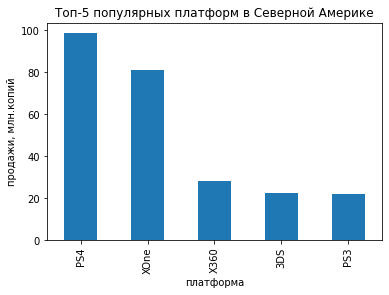

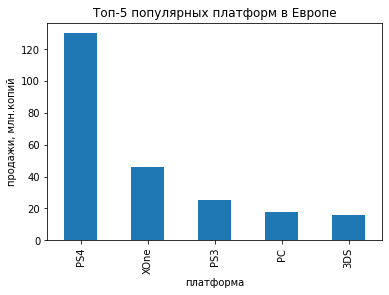

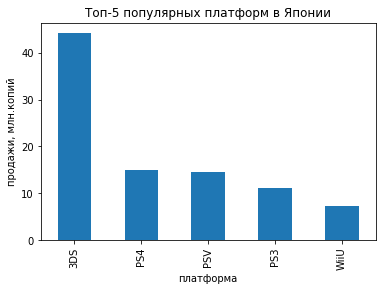

In [ ]:
na_platform_5.plot.bar(x='платформа', y='продажи, млн.копий', ylabel='продажи, млн.копий',
                       title='Топ-5 популярных платформ в Северной Америке',legend=None)
eu_platform_5.plot.bar(x='платформа', y='продажи, млн.копий', ylabel='продажи, млн.копий',
                       title='Топ-5 популярных платформ в Европе',legend=None)
jp_platform_5.plot.bar(x='платформа', y='продажи, млн.копий', ylabel='продажи, млн.копий',
                       title='Топ-5 популярных платформ в Японии',legend=None);


В Северной Америке и Европе две самые популярные платформы PS4 и XOne.	Однако, в отличии от Северной Америки, где доля продаж двух популярных платформ не сильно отличается, в Европе доля продаж PS4 почти в 3 раза превышает XOne. В Японии самая популярная платформа 3DS доля которой тоже почти в 3 раза больше доли второй по популярности - PS4. Видно, что вкусы пользователей Северной Америки и Европы довольно схожи, а у пользователей Японии другие предпочтения.

**Самые популярные жанры (топ-5)**

In [ ]:
na_genre = (data_new.pivot_table(index='genre', values='na_sales', aggfunc='sum')
                    .sort_values(by='na_sales', ascending=False)
            )
na_genre['share_of_sales'] = (na_genre['na_sales']/(na_genre['na_sales'].sum())*100).round(2)
na_genre_5 = na_genre.head(5).reset_index()
na_genre_5.columns = ['жанр', 'продажи, млн.копий', 'доля продаж']
print('Самые популярные жанры в Северной Америке')
na_genre_5

Самые популярные жанры в Северной Америке


,жанр,"продажи, млн.копий",доля продаж
0,Shooter,79.02,27.82
1,Action,72.53,25.53
2,Sports,46.13,16.24
3,Role-Playing,33.47,11.78
4,Misc,15.05,5.30


In [ ]:
eu_genre = (data_new.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                    .sort_values(by='eu_sales', ascending=False)
            )
eu_genre['share_of_sales'] = (eu_genre['eu_sales']/(eu_genre['eu_sales'].sum())*100).round(2)
eu_genre_5 = eu_genre.head(5).reset_index()
eu_genre_5.columns = ['жанр', 'продажи, млн.копий', 'доля продаж']
print('Самые популярные жанры в Европе')
eu_genre_5

Самые популярные жанры в Европе


,жанр,"продажи, млн.копий",доля продаж
0,Action,74.68,27.59
1,Shooter,65.52,24.21
2,Sports,45.73,16.89
3,Role-Playing,28.17,10.41
4,Racing,14.13,5.22


In [ ]:
jp_genre = (data_new.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                    .sort_values(by='jp_sales', ascending=False)
            )
jp_genre['share_of_sales'] = (jp_genre['jp_sales']/(jp_genre['jp_sales'].sum())*100).round(2)
jp_genre_5 = jp_genre.head(5).reset_index()
jp_genre_5.columns = ['жанр', 'продажи, млн.копий', 'доля продаж']
print('Самые популярные жанры в Японии')
jp_genre_5

Самые популярные жанры в Японии


,жанр,"продажи, млн.копий",доля продаж
0,Role-Playing,31.16,33.47
1,Action,29.58,31.78
2,Fighting,6.37,6.84
3,Misc,5.61,6.03
4,Shooter,4.87,5.23


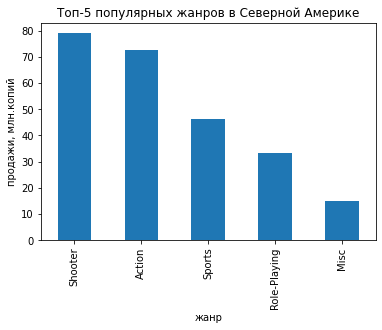

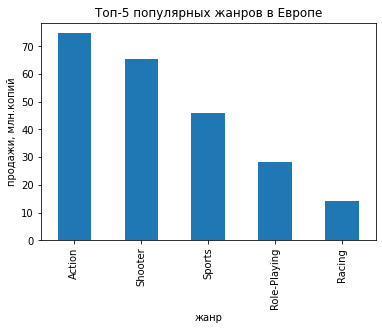

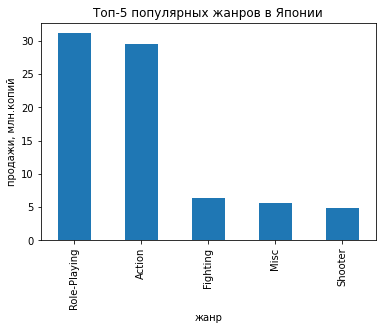

In [ ]:
na_genre_5.plot.bar(x='жанр', y='продажи, млн.копий', ylabel='продажи, млн.копий',
                    title='Топ-5 популярных жанров в Северной Америке',legend=None)
eu_genre_5.plot.bar(x='жанр', y='продажи, млн.копий', ylabel='продажи, млн.копий',
                    title='Топ-5 популярных жанров в Европе',legend=None)
jp_genre_5.plot.bar(x='жанр', y='продажи, млн.копий', ylabel='продажи, млн.копий',
                    title='Топ-5 популярных жанров в Японии',legend=None);

В Северной Америке 2 самых популярных жанра Shooter и Action разница в долях продаж между ними совсем незначительная. В Европе также самыми популярными являются данные жанры и также разница в продаж между ними незначительна. Только если в Северной Америке первое место у Shooter, то Европе - у Action, 3 и 4 место в Европе и Америке полностью совпадают. В Японии же самый популярный жанр Role-Playing, хотя и игры Action хорошо продаются - они на втором месте и не сильно отстают от лидера. Здесь опять видно, что предпочтения пользователей Северной Америки и Европы довольно схожи, а от пользователей из Японии - отличаются.

**Влияние рейтинга ESRB**

In [ ]:
na_raiting = (data_new.query('rating != "without raiting"')
                      .pivot_table(index='rating', values='na_sales', aggfunc='sum')
                      .sort_values(by='na_sales', ascending=False).reset_index()
           )
na_raiting.columns = ['рейтинг', 'продажи, млн.копий']
print('Влияние рейтинга в Северной Америке')
na_raiting

Влияние рейтинга в Северной Америке


,рейтинг,"продажи, млн.копий"
0,M,96.42
1,E,50.74
2,T,38.95
3,E10+,33.23


In [ ]:
eu_raiting = (data_new.query('rating != "without raiting"')
                    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                    .sort_values(by='eu_sales', ascending=False).reset_index()
             )
eu_raiting.columns = ['рейтинг', 'продажи, млн.копий']
print('Влияние рейтинга в Европе')
eu_raiting

Влияние рейтинга в Европе


,рейтинг,"продажи, млн.копий"
0,M,93.44
1,E,58.06
2,T,34.07
3,E10+,26.16


In [ ]:
jp_raiting = (data_new.query('rating != "without raiting"')
                      .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                      .sort_values(by='jp_sales', ascending=False).reset_index()
             )
jp_raiting.columns = ['рейтинг', 'продажи, млн.копий']
print('Влияние рейтинга в Японии')
jp_raiting

Влияние рейтинга в Японии


,рейтинг,"продажи, млн.копий"
0,T,14.78
1,E,8.94
2,M,8.01
3,E10+,4.46


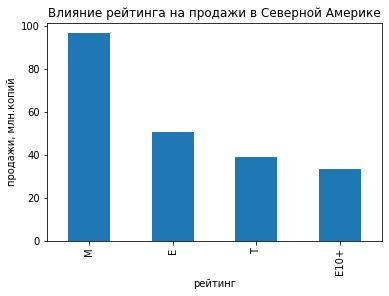

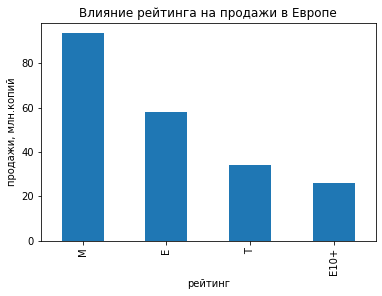

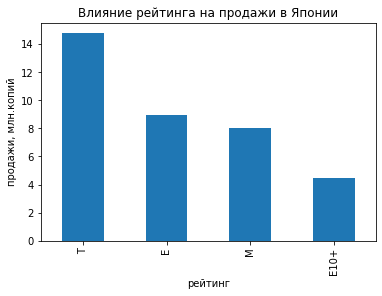

In [ ]:
na_raiting.plot.bar(x='рейтинг', y='продажи, млн.копий', ylabel='продажи, млн.копий',
                    title='Влияние рейтинга на продажи в Северной Америке',legend=None)
eu_raiting.plot.bar(x='рейтинг', y= 'продажи, млн.копий', ylabel='продажи, млн.копий',
                    title='Влияние рейтинга на продажи в Европе',legend=None)
jp_raiting.plot.bar(x='рейтинг', y= 'продажи, млн.копий', ylabel='продажи, млн.копий',
                    title='Влияние рейтинга на продажи в Японии',legend=None);

Распределение количества продаж в зависимости от рейтинга в Северной Америке и Европе идентично, больше всего продаж у игр с рейтингом М, затем в порядке убывания Е, Т и Е10+. В Японии распределение продаж в зависимости от рейтинга отличается, там также на втором месте Е, на последнем Е10+, но лидируют игры с рейтингом Т, а с рейтингом М - на третьем месте.

In [ ]:
na_raiting = (data_new.pivot_table(index='rating', values='na_sales', aggfunc='sum')
                      .sort_values(by='na_sales', ascending=False).reset_index()
              )
na_raiting.columns = ['рейтинг', 'продажи, млн.копий']
print('Влияние рейтинга в Северной Америке')
na_raiting

Влияние рейтинга в Северной Америке


,рейтинг,"продажи, млн.копий"
0,M,96.42
1,without raiting,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


In [ ]:
eu_raiting = (data_new.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                      .sort_values(by='eu_sales', ascending=False).reset_index()
             )
eu_raiting.columns = ['рейтинг', 'продажи, млн.копий']
print('Влияние рейтинга в Европе')
eu_raiting

Влияние рейтинга в Европе


,рейтинг,"продажи, млн.копий"
0,M,93.44
1,without raiting,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


In [ ]:
jp_raiting = (data_new.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                      .sort_values(by='jp_sales', ascending=False).reset_index()
             )
jp_raiting.columns = ['рейтинг', 'продажи, млн.копий']
print('Влияние рейтинга в Японии')
jp_raiting

Влияние рейтинга в Японии


,рейтинг,"продажи, млн.копий"
0,without raiting,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


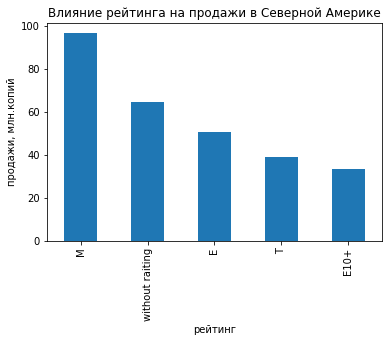

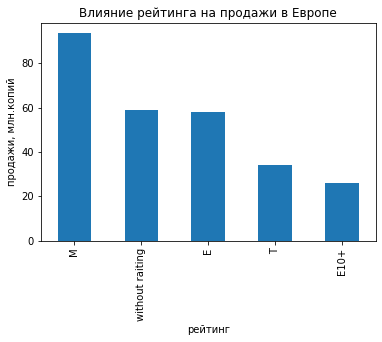

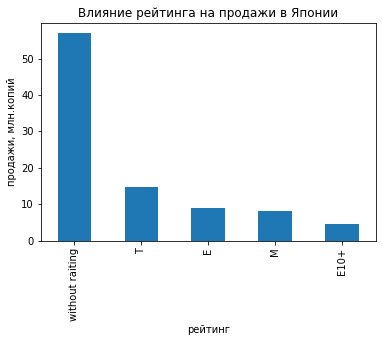

In [ ]:
na_raiting.plot.bar(x='рейтинг', y='продажи, млн.копий', ylabel='продажи, млн.копий',
                    title='Влияние рейтинга на продажи в Северной Америке',legend=None)
eu_raiting.plot.bar(x='рейтинг', y= 'продажи, млн.копий', ylabel='продажи, млн.копий',
                    title='Влияние рейтинга на продажи в Европе',legend=None)
jp_raiting.plot.bar(x='рейтинг', y= 'продажи, млн.копий', ylabel='продажи, млн.копий',
                    title='Влияние рейтинга на продажи в Японии',legend=None);

Распределение количества продаж в зависимости от рейтинга в Северной Америке и Европе идентично, больше всего продаж у игр с рейтингом М, затем в порядке убывания игры без рейтинга, Е, Т и Е10+. В Японии распределение продаж в зависимости от рейтинга сильно отличается, больше половины всех продаж у игр, которые не имеют рейтинг ESRB, среди продаж игр с рейтингом по убыванию продаж -Т, Е, М, Е10+.

Рассмотрев самые популярные платформы и жанры игр у пользователей трех регионов (Северная Америка, Европа, Япония), а также влияние рейтинга на продажи, можно сделать вывод, что предпочтения пользователей из Северной Америки и Европы схожи, а предпочтения пользователей из Японии отличаются. Т.о. при планировании стратегии продаж на следующий год нужно учитывать регион.

###5 Проверка гипотез

**Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**
```
H_0: Средний пользовательский рейтинг платформы Xbox One = средний пользовательский рейтинг платформы PC`
H_1: Средний пользовательский рейтинг платформы Xbox One ≠ средний пользовательский рейтинг платформы PC`
```

In [ ]:
from scipy import stats as st

In [ ]:
xbox_one = data_new.loc[(data_new['platform'] == "XOne") & (data_new['user_score']!=-1)]['user_score']
pc = data_new.loc[(data_new['platform'] == "PC") & (data_new['user_score']!=-1)]['user_score']

results = st.ttest_ind(xbox_one, pc, equal_var= False)
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Для проверки гипотезы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, была сформулирована нулевая гипотеза H_0: Средний пользовательский рейтинг платформы Xbox One = средний пользовательский рейтинг платформы PC и альтернативная гипотеза H_1: Средний пользовательский рейтинг платформы Xbox One ≠ средний пользовательский рейтинг платформы PC Для проверки гипотезы был применен t-тест для сравнения средних, т.к. выборки могут быть разного размера, при применении метода st.ttest_ind() был указан параметр equal_var= False. В результате не получилось отвергнуть нулевую гипотезу. Значит, можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

**Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные**
```
H_0: Средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports`
H_1: Средний пользовательский рейтинг жанра Action ≠ средний пользовательский рейтинг жанра Sports`
```

In [ ]:
action = data_new.loc[(data_new['genre'] == "Action") & (data_new['user_score']!=-1)]['user_score']
sports = data_new.loc[(data_new['genre'] == "Sports") & (data_new['user_score']!=-1)]['user_score']

results = st.ttest_ind(action, sports, equal_var=False)
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Для проверки гипотезы, что средние пользовательские рейтинги жанров Action и Sports разные, была сформулирована нулевая гипотеза H_0: Средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports и альтернативная гипотеза H_1: Средний пользовательский рейтинг жанра Action ≠ средний пользовательский рейтинг жанра Sports. Для проверки гипотезы был применен t-тест для сравнения средних, т.к. выборки могут быть разного размера, при применении метода st.ttest_ind() был указан параметр equal_var= False. Данные предоставляют достаточно оснований отвергнуть нулевую гипотезу. Значит, можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports не равны.

### Общий вывод

Для исследования были использованы данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Все пропуски в данных были обработаны. Строки с пропусками в названии игр были удалены (2). Пропуски в годах выпуска частично были восстановлены, частично удалены (158). В столбце critic_score пропуски заменены на 0. В столбце 'user_score' ячейки с пропусками и со значением tbd заменены на -1. Пропуски в столбце rating заполнены значением "without raiting". Доля удаленных данных составила менее 1%. Были изменены типы данных в столбце year_of_release (с float на int), в столбце critic_score (с float на int), в столбце user_score (с object на float). Добавлен новый столбец 'total_sales' с суммарными продажами во всех регионах.

Было проанализировано количество выпускаемых игр в разные годы и обнаружено, что до 2008-2009 гг наблюдалась тенденция постоянного роста количества выпускаемых игр, но с 2009 года начинается снижение с резким падением в 2012 и в дальнейшем уже сохраняется практически на одном уровне, т.о. видно, что 2012 году в производстве игр произошли серьезные изменения. Средний срок, за который появляются новые и исчезают старые платформы составляет примерно 10 лет. Для анализа был определен актуальный период - 2014-2016 гг.
В рассматриваемом периоде лидерами по продажам являются платформы PS4 и XOne, однако наблюдается тревожная тенденция снижения продаж у всех платформ в 2016 году.
Было рассмотрено влияние на продажи внутри платформы отзывов критиков и пользователей и обнаружено, что влияние либо слабое, либо практически отсутствует, что позволило сделать вывод, что на основании оценок игр строить прогнозы продаж некорректно.
Были определены самые продаваемые жанры игр, на первом месте игры жанра Shooter, на втором - Sports. Игры с наименьшими продажами - Strategy и Adventure, их продажи схожи. Средние продажи игр жанра Shooter в 14 раз превышают средние продажи Adventure.
Были рассмотрены самые популярные платформы и жанры игр у пользователей трех регионов (Северная Америка, Европа, Япония), а также влияние рейтинга на продажи в указанных регионах.
В Северной Америке и Европе две самые популярные платформы PS4 и XOne. В Японии самая популярная платформа 3DS доля которой тоже почти в 3 раза больше доли второй по популярности - PS4. В Северной Америке и Европе 2 самых популярных жанра Shooter и Action. В Японии же самый популярный жанр Role-Playing, игры Action - на втором месте.
Распределение количества продаж в зависимости от рейтинга в Северной Америке и Европе идентично, больше всего продаж у игр с рейтингом М, затем в порядке убывания игры без рейтинга, Е, Т и Е10+. В Японии распределение продаж в зависимости от рейтинга сильно отличается, больше половины всех продаж у игр, которые не имеют рейтинг ESRB, среди продаж игр с рейтингом в порядке убывания -Т, Е, М, Е10+. Таким образом выявлено, что предпочтения пользователей из Северной Америки и Европы схожи, а предпочтения пользователей из Японии отличаются, поэтому и стратегии продаж в этих регионах будут отличаться.
Были проверены две гипотезы и сделаны выводы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, средние пользовательские рейтинги жанров Action и Sports не равны.

Исходя из проведенного исследования можно сделать вывод, что потенциально популярными в следующем периоде будут платформы PS4 и XOne, жанр Shooter. Если планировать отдельно для регионов, то для Европы и Северной Америки потенциально популярными в следующем периоде будет также жанр Action, наиболее популярны игры с рейтингом М. Для Японии популярной - платформа 3DS, жанр - Role-Playing и игры без рейтинга ESRB.